In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
os.chdir(module_path)

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

In [4]:
import train as TR
from features import utils
from features import feature_combine, feature_clean
from features import data_clean
from evaluator import Evaluator

/usr/local/google/home/hzn/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
import config
config_file = 'test_config'

# Configuration:
config_dict = getattr(config, config_file)

# Mandatory configurations:
# Feature list
feature_list = config_dict['feature_list']

In [6]:
prop = utils.load_properties_data()

In [9]:
prop = feature_combine.original_feature_clean(prop, feature_clean, False, 'features/feature_pickles/')

In [10]:
prop

,airconditioningtypeid,architecturalstyletypeid,assessmentyear,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,...,taxdelinquencyyear,taxvaluedollarcnt,threequarterbathnbr,total_room_fill_nan,total_room_with_nan,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt
0,NaN,19.0,2015.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,...,NaN,9.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,19.0,2015.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,...,NaN,27516.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,19.0,2015.0,0.0,0.0,0.0,0.0,7.0,2.0,73026.0,...,NaN,1413387.0,NaN,0.0,0.0,NaN,2.0,NaN,NaN,NaN
3,5.0,19.0,2015.0,0.0,0.0,0.0,3.0,7.0,2.0,5068.0,...,NaN,1156834.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1948.0
4,5.0,19.0,2015.0,0.0,0.0,0.0,4.0,7.0,2.0,1776.0,...,NaN,433491.0,NaN,0.0,0.0,NaN,1.0,NaN,NaN,1947.0
5,5.0,19.0,2015.0,0.0,0.0,0.0,4.0,7.0,2.0,2400.0,...,NaN,283315.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1943.0
6,NaN,19.0,2015.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,...,NaN,554573.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
7,5.0,19.0,2015.0,0.0,0.0,0.0,0.0,7.0,2.0,3611.0,...,NaN,688486.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1946.0
8,NaN,19.0,2015.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,...,NaN,9.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,6.0,19.0,2015.0,0.0,0.0,0.0,3.0,7.0,2.0,3754.0,...,NaN,261201.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1978.0


In [8]:
allfeatures=list(prop.columns)

In [9]:
def dummy(name):
    template = "def %s(df):\n    return df['%s']\n"
    return template % (name, name)

In [20]:
text = "\n".join([dummy(name) for name in allfeatures])

In [21]:
print(text)

def parcelid(df):
    return df['parcelid']

def airconditioningtypeid(df):
    return df['airconditioningtypeid']

def architecturalstyletypeid(df):
    return df['architecturalstyletypeid']

def basementsqft(df):
    return df['basementsqft']

def bathroomcnt(df):
    return df['bathroomcnt']

def bedroomcnt(df):
    return df['bedroomcnt']

def buildingclasstypeid(df):
    return df['buildingclasstypeid']

def buildingqualitytypeid(df):
    return df['buildingqualitytypeid']

def calculatedbathnbr(df):
    return df['calculatedbathnbr']

def decktypeid(df):
    return df['decktypeid']

def finishedfloor1squarefeet(df):
    return df['finishedfloor1squarefeet']

def calculatedfinishedsquarefeet(df):
    return df['calculatedfinishedsquarefeet']

def finishedsquarefeet12(df):
    return df['finishedsquarefeet12']

def finishedsquarefeet13(df):
    return df['finishedsquarefeet13']

def finishedsquarefeet15(df):
    return df['finishedsquarefeet15']

def finishedsquarefeet50(df):
    r

nan count

In [10]:
len(prop['airconditioningtypeid'])-prop['airconditioningtypeid'].count()

2173698

In [12]:
df = prop

In [38]:
def nanno(name):
    return len(df[name])-df[name].count()

In [31]:
row_indexer=(prop['airconditioningtypeid'].isnull()) & (prop['yearbuilt']<=1965)
col_indexer=['airconditioningtypeid']
prop.loc[row_indexer, col_indexer] = 5

In [33]:
prop

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.369141,NaN,NaN,NaN
3,10859147,5.0,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.570312,NaN,NaN,NaN
4,10879947,5.0,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.169922,NaN,NaN,NaN
5,10898347,5.0,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.280029,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.339844,NaN,NaN,NaN
7,10940747,5.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.839844,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.760010,NaN,NaN,NaN


In [40]:
nanno('architecturalstyletypeid')

2979156

In [41]:
df['architecturalstyletypeid'].value_counts()

7.0     5251
8.0      380
2.0      201
21.0     150
3.0       58
5.0       19
27.0       1
10.0       1
Name: architecturalstyletypeid, dtype: int64

Change all nans to 19(other)

In [42]:
df['architecturalstyletypeid'].fillna(19)

0          19.0
1          19.0
2          19.0
3          19.0
4          19.0
5          19.0
6          19.0
7          19.0
8          19.0
9          19.0
10         19.0
11         19.0
12         19.0
13         19.0
14         19.0
15         19.0
16         19.0
17         19.0
18         19.0
19         19.0
20         19.0
21         19.0
22         19.0
23         19.0
24         19.0
25         19.0
26         19.0
27         19.0
28         19.0
29         19.0
           ... 
2985187    19.0
2985188    19.0
2985189    19.0
2985190    19.0
2985191    19.0
2985192    19.0
2985193    19.0
2985194    19.0
2985195    19.0
2985196    19.0
2985197    19.0
2985198    19.0
2985199    19.0
2985200    19.0
2985201    19.0
2985202    19.0
2985203    19.0
2985204    19.0
2985205    19.0
2985206    19.0
2985207    19.0
2985208    19.0
2985209    19.0
2985210    19.0
2985211    19.0
2985212    19.0
2985213    19.0
2985214    19.0
2985215    19.0
2985216    19.0
Name: architecturalstyle

In [43]:
nanno('basementsqft')

2983589

In [45]:
nanno('bathroomcnt')

11462

# How to fill in bathroom and bedroom count?

In [52]:
df['bathroomcnt'].median()

2.0

In [53]:
df['bedroomcnt'].median()

3.0

In [54]:
df['buildingclasstypeid'].value_counts()

4.0    9265
3.0    3161
2.0      81
1.0      65
5.0      57
Name: buildingclasstypeid, dtype: int64

In [55]:
df['buildingqualitytypeid'].value_counts()

7.0     1133238
4.0      692160
1.0       69467
10.0      39713
12.0       3692
6.0          94
8.0          51
9.0          25
5.0          21
11.0         19
3.0           6
2.0           2
Name: buildingqualitytypeid, dtype: int64

In [58]:
df['buildingqualitytypeid'].median()

7.0

In [68]:
df['calculatedbathnbr'].median()

2.0

In [67]:
df['decktypeid'].value_counts()

66.0    17096
Name: decktypeid, dtype: int64

# How to fill in Finished floor 1squarefeet ?
Using calculated finished square feet?

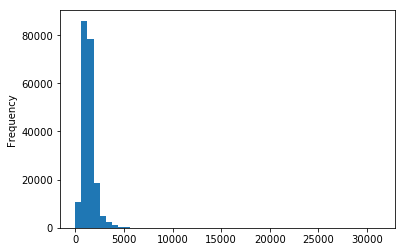

In [73]:
df['finishedfloor1squarefeet'].plot.hist(bins=50)

In [81]:
nanno('finishedfloor1squarefeet')

2782500

In [79]:
df[df['finishedfloor1squarefeet']>5000]['finishedfloor1squarefeet']

15664       6856.0
15962       5248.0
29169       6759.0
29505       5232.0
30844      15998.0
30846       6488.0
43488       6589.0
60292       6840.0
60296       5457.0
75341       5503.0
90265       5458.0
90292       5982.0
117963      5176.0
119696      5572.0
119932      6804.0
134018      5330.0
134894      5328.0
134896      5109.0
134960      6039.0
147979      5673.0
149441      6743.0
163123      6574.0
164622      5252.0
178905      5260.0
179480      6976.0
179481      5232.0
179509      6097.0
179515      6234.0
192930      5276.0
207211      5151.0
            ...   
2809603     6266.0
2810975     5408.0
2811309     5299.0
2811345     5076.0
2823928     5882.0
2824306     8958.0
2825331     5312.0
2826193     5514.0
2826216     6077.0
2838896     5735.0
2840412     6160.0
2841044     6802.0
2841045     6064.0
2855872     6042.0
2855890     5917.0
2868920     5702.0
2870615     7365.0
2885024     5295.0
2900401     5531.0
2900444     5157.0
2915276     6551.0
2928440     

In [85]:
df['finishedfloor1squarefeet'].median()

1283.0

In [87]:
df['calculatedfinishedsquarefeet'].median()

1572.0

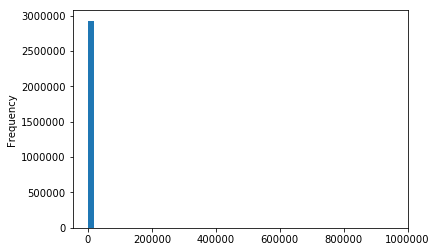

In [88]:
df['calculatedfinishedsquarefeet'].plot.hist(bins=50)

# Seems like some HUGE properties do not have (or have very few) rooms. Consider separate the area into a new feature

In [119]:
len(df[(df['calculatedfinishedsquarefeet']>100000) & (df['bedroomcnt']==0)])

76

In [117]:
df[(df['calculatedfinishedsquarefeet']>100000) & (df['bedroomcnt']>5)]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock


# Consider calculate average room area and filter out those UUUGE parcels

In [106]:
df.loc[44457]

parcelid                           11788150
airconditioningtypeid                     5
architecturalstyletypeid                nan
basementsqft                            nan
bathroomcnt                               0
bedroomcnt                                0
buildingclasstypeid                       2
buildingqualitytypeid                   nan
calculatedbathnbr                       nan
decktypeid                              nan
finishedfloor1squarefeet                nan
calculatedfinishedsquarefeet         161232
finishedsquarefeet12                    nan
finishedsquarefeet13                    nan
finishedsquarefeet15                 161232
finishedsquarefeet50                    nan
finishedsquarefeet6                     nan
fips                                   6037
fireplacecnt                            nan
fullbathcnt                             nan
garagecarcnt                            nan
garagetotalsqft                         nan
hashottuborspa                  

In [122]:
df['fips'].mode()[0]

6037.0

In [123]:
df['fireplacecnt'].value_counts()

1.0    269643
2.0     34407
3.0      7696
4.0       710
5.0       126
6.0        32
7.0        15
9.0         6
8.0         2
Name: fireplacecnt, dtype: int64

In [124]:
df['fullbathcnt'].value_counts()

2.0     1425661
3.0      660139
1.0      544928
4.0      151004
5.0       43918
6.0       17198
7.0        6409
8.0        4557
9.0        1339
10.0        498
12.0        263
11.0        204
13.0         53
14.0         45
16.0         30
15.0         23
18.0         15
20.0         10
17.0          7
19.0          4
Name: fullbathcnt, dtype: int64

In [125]:
df['fullbathcnt'].median()

2.0

In [126]:
df['garagecarcnt'].value_counts()

2.0     660462
1.0     177579
3.0      19634
0.0      14005
4.0       8495
5.0       1705
6.0        575
7.0        266
8.0        181
9.0        127
10.0        78
11.0        62
12.0        41
13.0        16
14.0        14
15.0         9
17.0         4
16.0         3
19.0         3
21.0         2
20.0         2
24.0         2
25.0         1
18.0         1
Name: garagecarcnt, dtype: int64

In [38]:
df['garagetotalsqft'].plot.hist(bins=50)

NameError: name 'df' is not defined

In [131]:
df[df['garagetotalsqft']>2000][['garagetotalsqft', 'garagecarcnt']]

,garagetotalsqft,garagecarcnt
10532,2107.0,7.0
12524,2426.0,8.0
12529,2301.0,8.0
13997,2799.0,9.0
27101,2232.0,8.0
27412,2184.0,8.0
28649,2202.0,8.0
28870,3598.0,12.0
29090,3582.0,12.0
30021,2240.0,8.0


In [133]:
avggarage=df['garagetotalsqft'] / df['garagecarcnt']

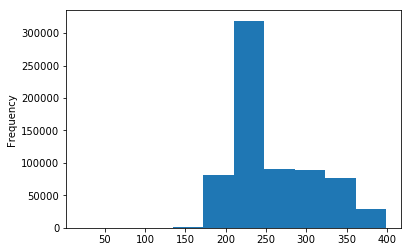

In [142]:
avggarage[(avggarage.notnull()) & (avggarage > 0) & (avggarage != np.inf)].plot.hist()

# Garage smaller than one fucking car

In [144]:
df[(df['garagecarcnt']==0) & (df['garagetotalsqft']>0)][['garagetotalsqft', 'garagecarcnt']]

,garagetotalsqft,garagecarcnt
326,79.0,0.0
40132,110.0,0.0
100682,119.0,0.0
131413,128.0,0.0
209072,126.0,0.0
371961,88.0,0.0
372095,128.0,0.0
402570,19.0,0.0
516901,128.0,0.0
521502,19.0,0.0


# What are those?

In [145]:
df[(df['garagecarcnt']>0) & (df['garagetotalsqft']==0)][['garagetotalsqft', 'garagecarcnt']]

,garagetotalsqft,garagecarcnt
262,0.0,2.0
264,0.0,2.0
265,0.0,2.0
266,0.0,2.0
268,0.0,2.0
269,0.0,2.0
308,0.0,2.0
311,0.0,2.0
313,0.0,1.0
318,0.0,2.0


In [8]:
prop['propertycountylandusecode']

0          010D
1          0109
2          1200
3          1200
4          1210
5          1210
6          010V
7          1210
8          010D
9          1210
10         1200
11         010D
12         010D
13         300V
14         0100
15         0100
16         0100
17         1210
18         300V
19         0100
20         1210
21         1210
22         1210
23         1210
24         1210
25         0100
26         0200
27         1200
28         010C
29         0100
           ... 
2985187     NaN
2985188     NaN
2985189     NaN
2985190     NaN
2985191     NaN
2985192     NaN
2985193     NaN
2985194     NaN
2985195     NaN
2985196     NaN
2985197     NaN
2985198     NaN
2985199     NaN
2985200     NaN
2985201     NaN
2985202     NaN
2985203     NaN
2985204     NaN
2985205     NaN
2985206     NaN
2985207     NaN
2985208     NaN
2985209     NaN
2985210     NaN
2985211     NaN
2985212     NaN
2985213     NaN
2985214     NaN
2985215     NaN
2985216     NaN
Name: propertycountyland

In [55]:
((prop['garagecarcnt'] > 0) & (prop['garagetotalsqft'] == 0)).sum()

182804

In [50]:
(prop['garagetotalsqft'] == 0).sum()

196752

In [53]:
(prop['garagecarcnt'] == 0).sum()

14005

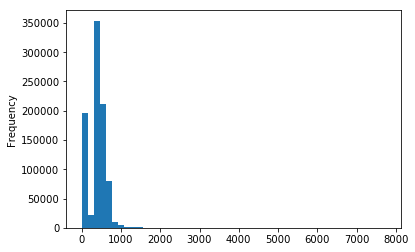

In [39]:
prop['garagetotalsqft'].plot.hist(bins=50)

In [32]:
lo_pct = 0
up_pct = 1
lo_cap = None
up_cap = None
feature = prop['garagetotalsqft']
result = feature.fillna(feature.median())
if lo_pct > 0:
    # the percentile is based the values before fill nan
    lolimit = feature.quantile(lo_pct)
    result.loc[result < lolimit] = lolimit
if up_pct < 1:
    uplimit = feature.quantile(up_pct)
    result.loc[result > uplimit] = uplimit
if lo_cap is not None:
    result.loc[result < lo_cap] = lo_cap
if up_cap is not None:
    result.loc[result > up_cap] = up_cap

In [33]:
result.value_counts()

2.0     2762412
1.0      177579
3.0       19634
0.0       14005
4.0        8495
5.0        1705
6.0         575
7.0         266
8.0         181
9.0         127
10.0         78
11.0         62
12.0         41
13.0         16
14.0         14
15.0          9
17.0          4
16.0          3
19.0          3
21.0          2
20.0          2
24.0          2
25.0          1
18.0          1
Name: garagecarcnt, dtype: int64

In [66]:
# prop['hashottuborspa'] == True

In [60]:
prop['hashottuborspa'].value_counts()

True    69014
Name: hashottuborspa, dtype: int64

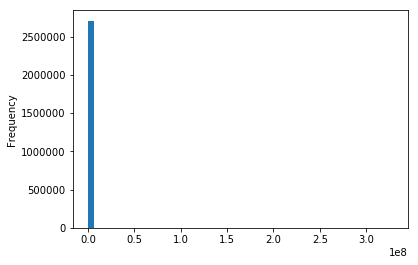

In [67]:
prop['lotsizesquarefeet'].plot.hist(bins=50)

In [69]:
print(prop['lotsizesquarefeet'].quantile(0.9985))
print(prop['lotsizesquarefeet'].quantile(0.0015))
print(prop['lotsizesquarefeet'].mean())
print(prop['lotsizesquarefeet'].median())

857201.2115000132
871.0
22820.755859375
7000.0


In [73]:
prop['roomcnt'].value_counts()

0.0     2308879
6.0      178357
7.0      156397
8.0      120227
5.0       99582
9.0       45241
4.0       42320
10.0      10862
3.0        6289
11.0       3021
12.0       1097
2.0         751
13.0        313
14.0        156
1.0          77
15.0         67
16.0         35
18.0         22
30.0         14
17.0          9
19.0          6
21.0          4
20.0          3
22.0          1
24.0          1
96.0          1
40.0          1
42.0          1
45.0          1
52.0          1
56.0          1
67.0          1
77.0          1
84.0          1
86.0          1
31.0          1
Name: roomcnt, dtype: int64

In [74]:
prop['threequarterbathnbr'].value_counts()

1.0    308959
2.0      2338
3.0       261
4.0        46
5.0        16
6.0         9
7.0         2
Name: threequarterbathnbr, dtype: int64

In [14]:
# prop['unitcnt'].value_counts()

In [25]:
# prop['yardbuildingsqft26'].notnull()

In [29]:
(prop['yearbuilt'].value_counts() > 10000).sum()

82

In [32]:
prop['numberofstories'].value_counts()

1.0     424186
2.0     242125
3.0      15678
4.0         58
5.0         11
6.0          4
7.0          2
41.0         1
20.0         1
17.0         1
14.0         1
8.0          1
Name: numberofstories, dtype: int64

In [33]:
prop['fireplaceflag'].value_counts()

True    5163
Name: fireplaceflag, dtype: int64

In [39]:
prop['taxdelinquencyyear'].value_counts()

15.0    26068
14.0    16826
13.0     4632
12.0     3124
11.0     2350
10.0     1552
9.0      1016
8.0       501
7.0       236
6.0        71
5.0        23
4.0        16
92.0        5
95.0        5
3.0         5
99.0        4
2.0         4
93.0        3
98.0        3
0.0         2
1.0         2
90.0        2
91.0        2
94.0        2
97.0        2
79.0        2
82.0        1
84.0        1
86.0        1
87.0        1
88.0        1
96.0        1
Name: taxdelinquencyyear, dtype: int64

In [38]:
tmp = prop['taxdelinquencyyear'].fillna(16)
result = tmp + 1900
# get the right year for 2000 to 2017
result = result.where(tmp > 17, result + 100)
result.value_counts()

2016.0    2928753
2015.0      26068
2014.0      16826
2013.0       4632
2012.0       3124
2011.0       2350
2010.0       1552
2009.0       1016
2008.0        501
2007.0        236
2006.0         71
2005.0         23
2004.0         16
2003.0          5
1992.0          5
1995.0          5
2002.0          4
1999.0          4
1993.0          3
1998.0          3
1990.0          2
1991.0          2
2000.0          2
1994.0          2
1997.0          2
2001.0          2
1979.0          2
1996.0          1
1988.0          1
1987.0          1
1986.0          1
1984.0          1
1982.0          1
Name: taxdelinquencyyear, dtype: int64

In [11]:
prop['propertylandusetypeid'].value_counts()

261.0    2148362
266.0     481067
246.0     114888
269.0      61469
263.0      58438
248.0      40325
247.0      40022
31.0        9462
265.0       9421
47.0        4314
260.0       2754
267.0       1817
275.0       1201
264.0        204
270.0         36
Name: propertylandusetypeid, dtype: int64

In [18]:
prop['propertyzoningdesc'].value_counts()

LAR1          275029
LAR3           67105
LARS           54859
LBR1N          52750
LAR2           48808
LARD1.5        39895
SCUR2          30459
LARD2          30377
TORR-LO        26632
LARA           26103
LARE11         24005
LCR1YY         22460
LARE15         18655
CARS*          17021
PSR6           15032
LCR1*          14916
LKR1YY         13470
LAR4           12750
LARD3          12424
GLR1YY         12252
LAC2           11917
PRSF*          11483
LCA11*         10633
BUR1YY         10472
LCA106         10340
SCUR3          10126
BPR1*          10080
CERS5000       10075
NOR1YY          9874
ALRPD*          9324
               ...  
FROM DUPTO         1
MPR2-R3*           1
WCR109             1
LCR171/2*          1
LRMUN              1
RBRMD/C-2          1
GLR2-R3*           1
SHRLM2             1
LCC4-A21*          1
LRR1-6000          1
WARPD37001         1
LACA17500*         1
LCRPD11.1*         1
BFA16000-C         1
WCPBYY             1
AHR1-7000*         1
LYR3Y4       

In [20]:
# prop['rawcensustractandblock'].value_counts()

In [21]:
prop['typeconstructiontypeid'].value_counts()

6.0     6670
4.0       59
13.0      14
10.0       3
11.0       1
Name: typeconstructiontypeid, dtype: int64

In [5]:
import train
from features import test_feature_list_2
feature_list = test_feature_list_2.feature_list

In [ ]:
import importlib
importlib.reload(train)

In [6]:
prop = train.prepare_features(feature_list, True)

Feature engineering
Using cleaned prop
features/feature_pickles_cleaned/geo_city_pickle
features/feature_pickles_cleaned/geo_county_pickle
features/feature_pickles_cleaned/geo_lat_lon_block_features_pickle


/usr/local/google/home/hzn/kaggle/kaggle-zillow/features/feature_eng_v2.py:473: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  values['lat_lon_block'] = blocks


features/feature_pickles_cleaned/geo_neighborhood_pickle
features/feature_pickles_cleaned/geo_zip_pickle
(2973780, 266)
Nan cells: 0


In [7]:
prop_original = utils.load_properties_data()

In [9]:
for col in prop_original.columns:
    print('\''+ col +'\',')

'parcelid',
'airconditioningtypeid',
'architecturalstyletypeid',
'basementsqft',
'bathroomcnt',
'bedroomcnt',
'buildingclasstypeid',
'buildingqualitytypeid',
'calculatedbathnbr',
'decktypeid',
'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'finishedsquarefeet6',
'fips',
'fireplacecnt',
'fullbathcnt',
'garagecarcnt',
'garagetotalsqft',
'hashottuborspa',
'heatingorsystemtypeid',
'latitude',
'longitude',
'lotsizesquarefeet',
'poolcnt',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7',
'propertycountylandusecode',
'propertylandusetypeid',
'propertyzoningdesc',
'rawcensustractandblock',
'regionidcity',
'regionidcounty',
'regionidneighborhood',
'regionidzip',
'roomcnt',
'storytypeid',
'threequarterbathnbr',
'typeconstructiontypeid',
'unitcnt',
'yardbuildingsqft17',
'yardbuildingsqft26',
'yearbuilt',
'numberofstories',
'fireplaceflag',
'structuretaxvaluedollarcnt',
'taxvalue

In [12]:
prop[prop['taxvaluedollarcnt_zip_std_ratio'].isnull()][['zip_count', 'taxvaluedollarcnt_zip_mean', 'taxvaluedollarcnt_zip_mean_ratio', 'taxvaluedollarcnt_zip_std', 'taxvaluedollarcnt_zip_std_ratio']]

,zip_count,taxvaluedollarcnt_zip_mean,taxvaluedollarcnt_zip_mean_ratio,taxvaluedollarcnt_zip_std,taxvaluedollarcnt_zip_std_ratio
1010965,1.0,429186.0,1.0,NaN,NaN
1625729,1.0,608892.0,1.0,NaN,NaN
2067166,1.0,6689709.0,1.0,NaN,NaN
2245671,1.0,311687.0,1.0,NaN,NaN
2429911,1.0,597481.0,1.0,NaN,NaN
2662114,1.0,265000.0,1.0,NaN,NaN
2735686,1.0,20.0,1.0,NaN,NaN


In [15]:
tdf = pd.DataFrame({'a': [0,1,1], 'b':[2, 3, 4]})
tdf.groupby('a').agg('std')

,b
a,
0,NaN
1,0.707107


In [17]:
avgrmsize=prop['calculatedfinishedsquarefeet']/(prop['bedroomcnt']+prop['bathroomcnt'])

In [43]:
avgrmsize[(avgrmsize!=np.inf) & avgrmsize.notnull()].quantile(0.99)

606.7999877929688

In [6]:
f=TR.prepare_features(feature_list)

Feature engineering
(2985217, 66)
(2985217, 66)


In [17]:
import importlib

In [23]:
importlib.reload(features.data_clean)

<module 'features.data_clean' from '/home/peter/dev/kaggle-zillow/features/data_clean.py'>

In [13]:
f['average_room_size'].quantile(0.99)

inf

In [24]:
features.data_clean.clip_create_outlier_bool(f['average_room_size'], 'average_room_size', 0, 0.9)

,average_room_size,average_room_size_overcap
0,NaN,False
1,NaN,False
2,449.200012,True
3,449.200012,True
4,449.200012,True
5,449.200012,True
6,NaN,False
7,449.200012,True
8,NaN,False
9,449.200012,True


In [9]:
f['average_room_size_overcap']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
           ..
2985187   NaN
2985188   NaN
2985189   NaN
2985190   NaN
2985191   NaN
2985192   NaN
2985193   NaN
2985194   NaN
2985195   NaN
2985196   NaN
2985197   NaN
2985198   NaN
2985199   NaN
2985200   NaN
2985201   NaN
2985202   NaN
2985203   NaN
2985204   NaN
2985205   NaN
2985206   NaN
2985207   NaN
2985208   NaN
2985209   NaN
2985210   NaN
2985211   NaN
2985212   NaN
2985213   NaN
2985214   NaN
2985215   NaN
2985216   NaN
Name: average_room_size_overcap, Length: 2985217, dtype: float32